<a href="https://colab.research.google.com/github/ericiortega/aipi590-xai-fall2025/blob/main/assignments/interpretable_ml/interpretable_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpretable ML Assignment
**Course:** AIPI 590 – Emerging Trends in Explainable AI (Fall 2025)  
**Professor:** Dr. Brinnae Bent  
**Author:** Eric Ortega Rodriguez  
**Dataset:** [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
**Deadline:** September 15, 2025  

---


## Introduction
The goal of this assignment is to analyze customer churn for a telecommunications company using interpretable machine learning models.
We will explore the dataset, apply three different models (Linear Regression, Logistic Regression, Generalized Additive Model),
and compare their performance and interpretability to provide recommendations.

### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading in the data

In [ ]:
# Load dataset directly from your GitHub repo
churn_data = "https://raw.githubusercontent.com/ericiortega/aipi590-xai-fall2025/main/data/telco_customer_churn.csv"
df = pd.read_csv(churn_data)

# Cleaning data
# Changing TotalCharges to numeric, coerce errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)

print(df.shape)
df.head()

(7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Exploratory Data Analysis (EDA) to Check Assumptions

In this section, I perform an exploratory analysis of the dataset to understand the
relationships between different features and the target variable (churn).
I use appropriate visualizations and statistical methods to determine
whether assumptions about linear, logistic, and GAM models are met.


In [7]:
df.info()
df.describe()
df["Churn"].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


,proportion
Churn,
No,0.734215
Yes,0.265785


EDA: Dataset Summary

- The dataset has **7,032 customers** with **21 features**.  
- Features include both **categorical** (e.g., Contract, PaymentMethod) and **numeric** (e.g., tenure, MonthlyCharges, TotalCharges) variables.  
- The target variable (`Churn`) shows that:
  - **73.4% of customers stayed**
  - **26.6% of customers churned**

**Implication for models:**
- Linear regression is less ideal since churn is not truly continuous.
- Logistic regression works well because churn is binary (Yes/No).
- GAM is valuable for capturing non-linear effects in numeric features like tenure and charges.


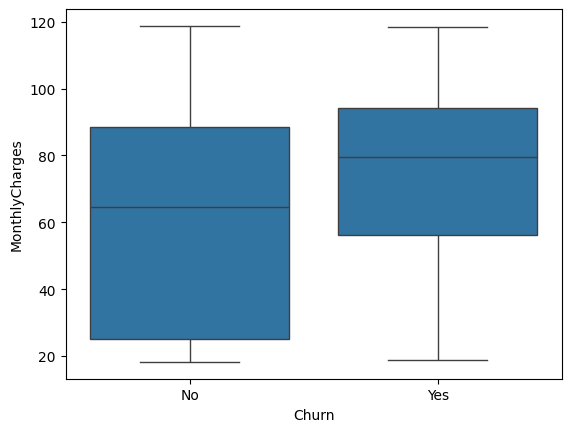

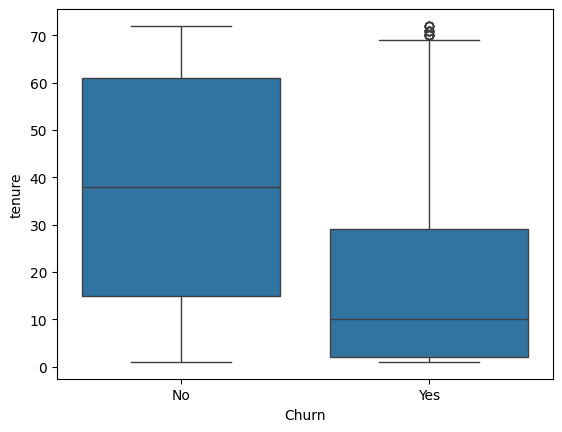

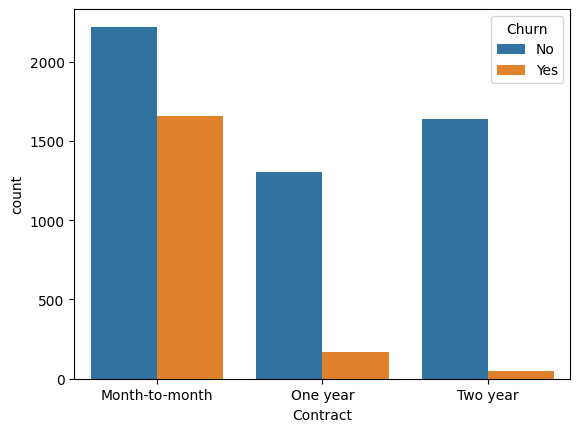

In [8]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()

sns.boxplot(x="Churn", y="tenure", data=df)
plt.show()

sns.countplot(x="Contract", hue="Churn", data=df)
plt.show()


## 2. Linear Regression

Here I treat the churn variable as a continuous variable (0 for staying, 1 for churning)
and build a linear regression model to predict churn. I interpret the coefficients
and assess the model's performance.


## 3. Logistic Regression

In this step, I treat churn as a binary variable and build a logistic regression model
to predict the probability of churn. I then interpret the model coefficients.


## 4. Generalized Additive Model (GAM)

Next, I build a GAM to model the non-linear relationships between customer features
and churn. I interpret the GAM model outputs to see how churn risk varies
with different features.


## 5. Model Comparison

Finally, I compare the performance and interpretability of the different models
(linear regression, logistic regression, and GAM). I discuss the strengths and
weaknesses of each approach and provide recommendations for which model(s) the
telecommunications company should use to address their customer churn problem.
